In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
df=pd.read_csv(r"DATA.csv")

In [2]:
df.head(5)

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [3]:
df.columns

Index(['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'Sore Throat',
       'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils',
       'HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox'],
      dtype='object')

In [4]:
# removing patient id , since there is no use with the id's
df.drop('Patient_ID',inplace=True,axis=1)

In [5]:
# finding unique values count
d={}
col=[]
val=[]
for i in df.columns:
    d[i]=len(df[i].unique())
for i,j in d.items():
    col.append(i)
    val.append(j)
unique=pd.DataFrame({'unique_value_count':val},index=col)
unique

,unique_value_count
Systemic Illness,4
Rectal Pain,2
Sore Throat,2
Penile Oedema,2
Oral Lesions,2
Solitary Lesion,2
Swollen Tonsils,2
HIV Infection,2
Sexually Transmitted Infection,2
MonkeyPox,2


Replacing all the categorical variables with unique count to bring data into proper format

In [6]:
# df.replace({False: 0, True: 1,'Negative':0,'Positive':1}, inplace=True)
# df

### EDA

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

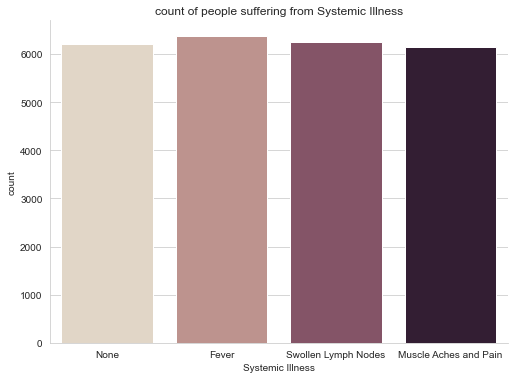

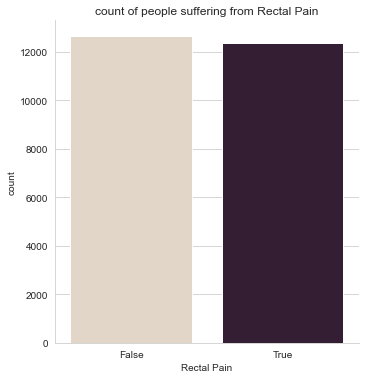

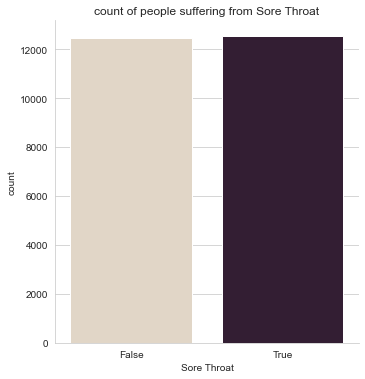

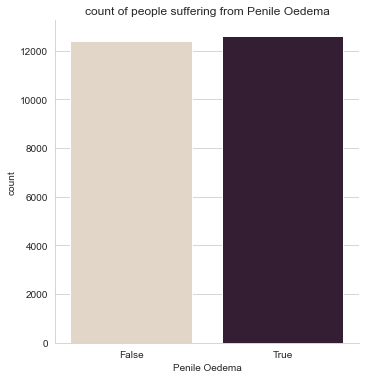

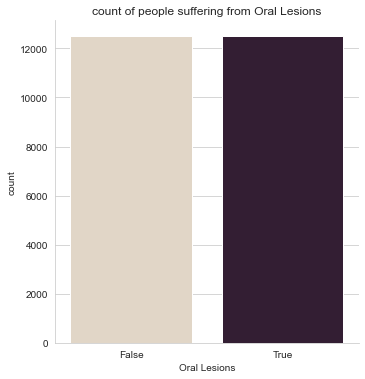

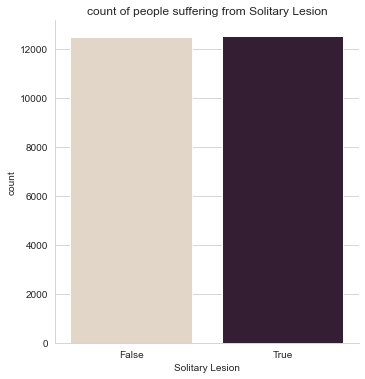

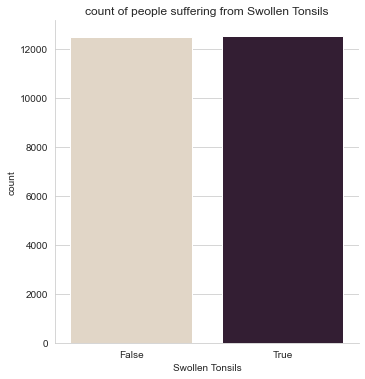

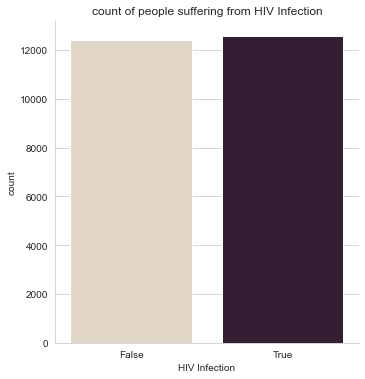

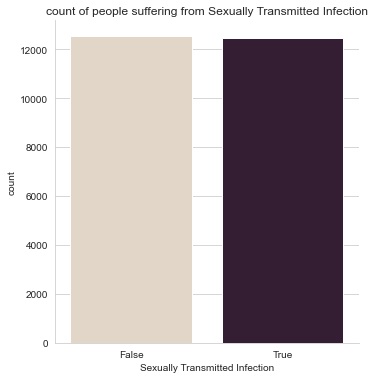

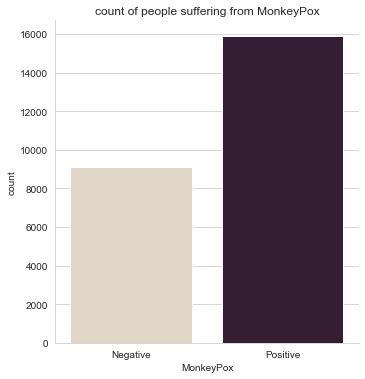

In [11]:
# univariate Analysis
for i in df.columns:
    if i!='Systemic Illness':
        sns.catplot(data=df, x=i, kind="count", palette="ch:.25").set(title='count of people suffering from '+i)
    else:
        sns.catplot(data=df, x=i, kind="count", palette="ch:.25",aspect=11.7/8.27).set(title='count of people suffering from '+i)

In [25]:
# feature Engineering
# since all colums are having just 2 unique types replacing all categorical with respect to 0 and 1 except the Systemic Illness
df.replace({False: 0, True: 1,'Negative':0,'Positive':1}, inplace=True)
df

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,None,0,1,1,1,0,1,0,0,0
1,Fever,1,0,1,1,0,0,1,0,1
2,Fever,0,1,1,0,0,0,1,0,1
3,None,1,0,0,0,1,1,1,0,1
4,Swollen Lymph Nodes,1,1,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
24995,None,1,1,0,1,1,0,0,1,1
24996,Fever,0,1,1,0,1,1,1,1,1
24997,None,1,1,0,0,1,1,0,0,1
24998,Swollen Lymph Nodes,0,1,0,1,1,1,0,0,0


In [26]:
from feature_engine.encoding import OneHotEncoder
ohe_enc = OneHotEncoder(
    top_categories=3,  # you can change this value to select more or less variables
    # we can select which variables to encode
    variables=['Systemic Illness'],
    drop_last=False)

ohe_enc.fit(df)
df = ohe_enc.transform(df)

In [27]:
df

,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox,Systemic Illness_Fever,Systemic Illness_Swollen Lymph Nodes,Systemic Illness_None
0,0,1,1,1,0,1,0,0,0,0,0,1
1,1,0,1,1,0,0,1,0,1,1,0,0
2,0,1,1,0,0,0,1,0,1,1,0,0
3,1,0,0,0,1,1,1,0,1,0,0,1
4,1,1,1,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1,1,0,1,1,0,0,1,1,0,0,1
24996,0,1,1,0,1,1,1,1,1,1,0,0
24997,1,1,0,0,1,1,0,0,1,0,0,1
24998,0,1,0,1,1,1,0,0,0,0,1,0


In [32]:
from sklearn.model_selection import train_test_split
from feature_engine.encoding import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['MonkeyPox'], axis=1),
    df['MonkeyPox'],
    test_size=0.3,
    random_state=0)

In [40]:
sel_ = RFE(RandomForestClassifier(n_estimators=10, random_state=10), n_features_to_select=5)
sel_.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(n_estimators=10, random_state=10),
    n_features_to_select=5)

In [41]:
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

5

In [42]:
def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
# features selected recursively
run_randomForests(X_train[selected_feat],
                  X_test[selected_feat],
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.6873127727421513
Test set
Random Forests roc-auc: 0.6960673099908079


In [44]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.pipeline import Pipeline

from feature_engine.selection import (
    RecursiveFeatureElimination,
    DropConstantFeatures,
    DropDuplicateFeatures,
)

In [45]:
# the ML model for which we want to select features

model = GradientBoostingClassifier(
    n_estimators=10,
    max_depth=2,
    random_state=10,
)

In [46]:
sel = RecursiveFeatureElimination(
    variables=None, # automatically evaluate all numerical variables
    estimator = model, # the ML model
    scoring = 'roc_auc', # the metric we want to evalute
    threshold = 0.0005, # the maximum performance drop allowed to remove a feature
    cv=2, # cross-validation
)

# this may take quite a while, because
# we are building a lot of models with cross-validation
sel.fit(X_train, y_train)

RecursiveFeatureElimination(cv=2,
                            estimator=GradientBoostingClassifier(max_depth=2,
                                                                 n_estimators=10,
                                                                 random_state=10),
                            threshold=0.0005)

In [47]:
sel.initial_model_performance_

0.6814807889900911

In [48]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((17500, 6), (7500, 6))

In [49]:
model.fit(X_train, y_train)

# make predictions
y_pred_test = model.predict_proba(X_test)[:, 1]

# calculate roc-auc
roc_final = roc_auc_score(y_test, y_pred_test)
print('Test selected features ROC AUC=%f' % (roc_final))

Test selected features ROC AUC=0.696381
